In [1]:
from FetusGrowth_BWPrediction import *
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np

In [2]:
plt.rcParams.update({
"xtick.labelsize": 30,
    "ytick.labelsize": 30,
    'legend.fontsize': 23,
    'axes.labelsize': 30 ,
    
     'axes.titlesize': 30,
   
    'font.serif': 'DejaVu Serif'
    })

In [3]:
def compare(intformsd,gompt0,gompc,label,ax,figxy):
    x = np.arange(14,43,dtype=float)
    y = [intformsd(i)[0] for i in x]
    y1 = [intformsd(i)[0]+intformsd(i)[1] for i in x]
    y2 = [intformsd(i)[0]-intformsd(i)[1] for i in x]
    ax[figxy].plot(x,y,label = 'INTERGROWTH',c = 'k')
    ax[figxy].plot(x,y1,c='k', linestyle = '--')
    ax[figxy].plot(x,y2,c='k', linestyle = '--')

    fit = curve_fit(func, x, y,[400,17,0.01])
    t0 = np.round(fit[0][1],3)
    c = np.round(fit[0][2],3)
    A = np.round(fit[0][0],3)
    fit1 = curve_fit(lambda t,A: func(t,A,t0,c), x, y1,[400])
    fit2 = curve_fit(lambda t,A: func(t,A,t0,c), x, y2,[400])
    dA = np.round(0.5*(fit1[0][0]-fit2[0][0]),3)
    ax[figxy].plot(x,func(x,A,t0,c),label = 'Gompertz (fit $A, t_0, c$)',color = 'r')
    ax[figxy].plot(x,func(x,A+dA,t0,c),color='r', linestyle = '--')
    ax[figxy].plot(x,func(x,A-dA,t0,c),color='r', linestyle = '--')


    fit = curve_fit(lambda t,A: func(t,A,gompt0,gompc), x, y,[400])
    A = fit[0][0]
    fit1 = curve_fit(lambda t,A: func(t,A,gompt0,gompc), x, y1,[400])
    fit2 = curve_fit(lambda t,A: func(t,A,gompt0,gompc), x, y2,[400])
    dA = np.round(0.5*(fit1[0][0]-fit2[0][0]),3)
    ax[figxy].plot(x,func(x,A,gompt0,gompc),label = 'Gompertz (fit only $A$)',color = 'b')
    ax[figxy].plot(x,func(x,A+dA,gompt0,gompc),color='b', linestyle = '--')
    ax[figxy].plot(x,func(x,A-dA,gompt0,gompc),color='b', linestyle = '--')
    ax[figxy].legend(loc = 'lower right', frameon = False);

In [4]:
t0C_list = pd.read_csv('t0_c.csv')

t0_hc,c_hc = t0C_list['t0_hc'][0], t0C_list['c_hc'][0]
t0_ac,c_ac = t0C_list['t0_ac'][0], t0C_list['c_ac'][0]
t0_bpd,c_bpd = t0C_list['t0_bpd'][0], t0C_list['c_bpd'][0]
t0_fl,c_fl = t0C_list['t0_fl'][0], t0C_list['c_fl'][0]

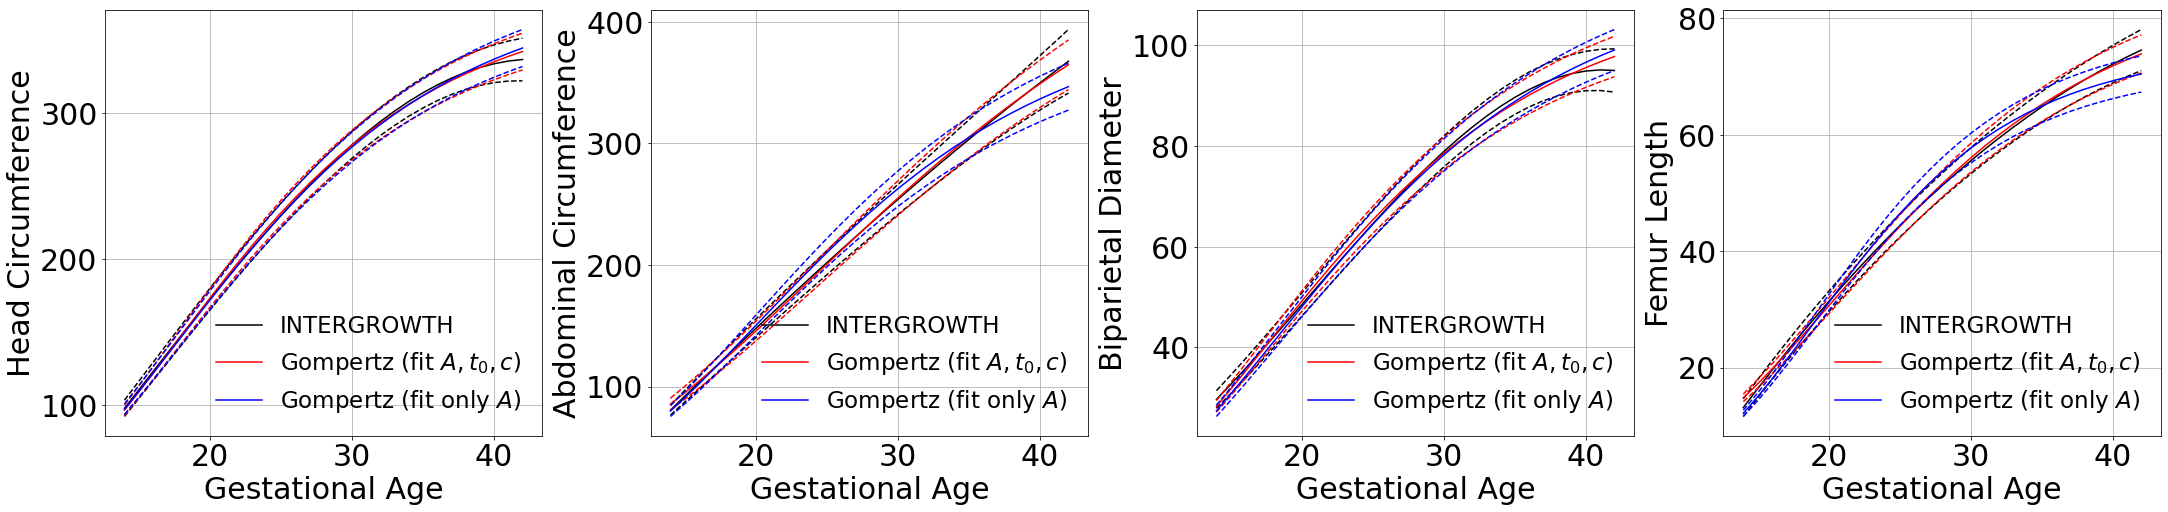

In [5]:
from matplotlib.ticker import MultipleLocator
fig, ax = plt.subplots(1, 4, figsize=(30,7),constrained_layout=True)
ax[0].set_xlabel('Gestational Age')
ax[0].set_ylabel('Head Circumference')
ax[0].set_yticks(np.arange(0, 450, 100))
ax[0].grid()

ax[1].set_xlabel('Gestational Age')
ax[1].set_ylabel('Abdominal Circumference');
ax[1].set_yticks(np.arange(0, 450, 100))
ax[1].grid()

ax[2].set_xlabel('Gestational Age')
ax[2].set_ylabel('Biparietal Diameter');
ax[2].grid()

ax[3].set_xlabel('Gestational Age')
ax[3].set_ylabel('Femur Length');
ax[3].grid()

compare(hc_mean_sd, t0_hc,c_hc,"HC",ax,0)
compare(ac_mean_sd, t0_ac,c_ac ,"AC",ax,1)
compare(bpd_mean_sd,t0_bpd,c_bpd,"BPD",ax,2)
compare(fl_mean_sd, t0_fl,c_fl,"FL",ax,3)

plt.savefig('FigOutput/gomp_intergrowth.png',dpi = 600,bbox_inches='tight')
plt.savefig('FigOutput/gomp_intergrowth.pdf',dpi = 600,bbox_inches='tight')